In [1]:
import numpy as np
import embedded_voting as ev
import matplotlib.pyplot as plt
from tqdm import tqdm
np.random.seed(42)

In [2]:
agg = ev.Aggregator(rule=ev.RuleFastNash(), name="FastNash")

In [3]:
n_candidates = 50
n_trys = 10000
default_group_noise = 10
n_training = 1000
default_indep_noise = 2

In [88]:
n_v = 3
groups_sizes = [n_v] + [1]*(20-n_v)
features = np.eye(20-n_v+1)
generator = ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                      features, 
                                                      group_noise=default_group_noise, 
                                                      independent_noise=default_indep_noise,
                                                      center_gap=0, 
                                                      max_scale=1,
                                                      truth_generator=ev.TruthGeneratorUniform(seed=42),
                                                      group_noise_f=np.random.normal,
                                                      independent_noise_f=np.random.normal)

In [89]:
v = generator(100)
agg.reset()
agg(v)

20 100 0.047619047619047616 0.05
sklearn : 18
[0.07429338 0.06404964 0.06059716 0.05918141 0.0564217  0.05598572
 0.05478771 0.05365725 0.0531295  0.05229615 0.0507156  0.04944881
 0.04827265 0.04752788 0.04595722 0.04533837 0.04506825 0.04189054
 0.0207328  0.02064825] 13


In [90]:
[100,200,400,800,1600,3200]

[0.12,0.58,0.73,0.83, 0.87,0.91] # [2] + [1]*98
[0,0.36,0.42,0.43,0.44,0.44]
[54,52,53,53,55,55]

[2.4,2.2,2.2,2.1,2.1,2.1] # [99] + [1]
[1.5,1.3,1.2,1.1,1.0,1.0]
[44,40,36,30,21,8]

[0.87,1.0,1.1,1.2,1.2,1.3] # [50] + [1]*50
[0.75,0.7,0.68,0.66,0.64,0.62]

[0.75, 0.7, 0.68, 0.66, 0.64, 0.62]

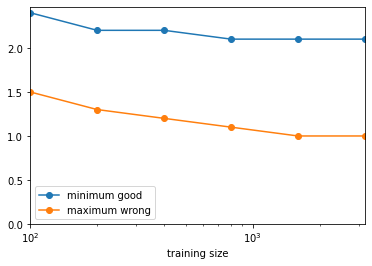

In [22]:
import matplotlib.pyplot as plt

plt.plot([100,200,400,800,1600,3200],[2.4,2.2,2.2,2.1,2.1,2.1], "o-", label="minimum good")
plt.plot([100,200,400,800,1600,3200],[1.5,1.3,1.2,1.1,1.0,1.0],  "o-",label="maximum wrong")
plt.xlabel("training size")
plt.xscale("log")
plt.ylim(0)
plt.xlim(100,3200)
plt.legend()
plt.show()

In [ ]:
# Enquete en faisant un groupe de 2 et que des groupes de 1 pour voir si ça évoluait en proportion ou en 1/(n+1) e ça évolue en
# proportion, i.e. peu importe le nombre de votant n de départ, l'évolution pour t(k) = nk iterations sera la même. 
# les "mauvaise" v.p vont tendre vers au plus 44% du seuil, alors que les autrs vont tendre vers 100% (mais pas rapidement)

# Par contre, avec 1 gros groupe et 1 autre algo, c'est pas la même histoire ! Cette fois on se retrouve avec trop
# de valeur propres au dessus du seuil

# Solution 1 : autre méthode pour trouver les vp
# SOlution 2 : j'ai pas de solution 2